### This is the Notebook for Lecture 13

In this lecture, we will learn techniques for manipulating images. This will include:

<ol>
    <li>Creating an image</li>
</ol>

In [3]:
# Import the Python image 
from PIL import Image

In [11]:
# Image that is 240x160 pixels with black background
image = Image.new('RGBA', (240, 160), (0,0,0))

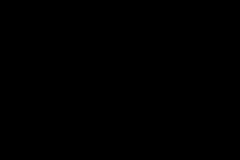

In [12]:
# Now we can display the image
display(image)

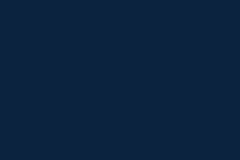

In [14]:
# Update the image with Notre Dame Blue
image = Image.new('RGBA', (240, 160), (12, 35, 64))
display(image)

### In-Class Coding Opportunity

Write a function called print_box( red, green, blue ) and importing interact which reads in values for red, green, and blue and shows the 240,160 box. Be sure to use the ranges of 0,255 for each color

In [20]:
# Use the interact to change colors
from ipywidgets import interact

In [21]:
def print_box( red, green, blue ):
    image = Image.new('RGBA', (240, 160), (red, green, blue))
    display(image)

In [22]:
interact(print_box, red=(0,255), green=(0,255), blue=(0,255))

interactive(children=(IntSlider(value=127, description='red', max=255), IntSlider(value=127, description='gree…

<function __main__.print_box(red, green, blue)>

### Processing an Image

Here, we will combine concepts of looping and % to print every other pixel as a ND_BLUE or ND_GOLD

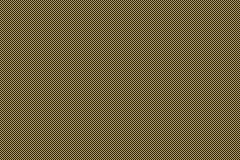

In [28]:
# Define the colors
ND_BLUE = (12, 35, 64)
ND_GOLD = (211, 159, 16)
width = 240
height = 160

#Define the initial image and get the 
image = Image.new('RGBA', (width, height))

for x in range(width):
    for y in range(height):
        
        if (x + y) % 2 == 0:
            image.putpixel((x, y), ND_BLUE)
            
        else:
            image.putpixel((x, y), ND_GOLD)
    
display(image)

### Combining Concepts

Write a program that generates an image of random colors of size 480 and 460

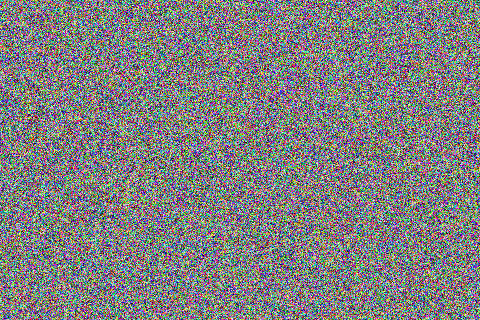

In [31]:
import random

image = Image.new('RGBA', (480, 320))
width, height = image.size

for x in range(width):
    for y in range(height):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        color = (r, g, b)
        image.putpixel((x, y), color)

display(image)

### In-Class Coding Opportunity

Create a tricolor flag

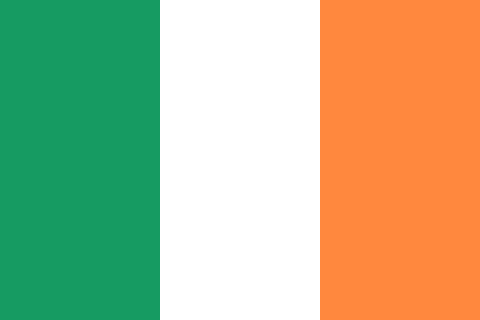

In [32]:
GREEN  = (22, 155, 98)
WHITE  = (255, 255, 255)
ORANGE = (255, 136, 62)

image = Image.new('RGBA', (480, 320))
width, height = image.size

for x in range(width):
    for y in range(height):
        if x < width/3:
            image.putpixel((x, y), GREEN)
        elif x < 2*width/3:
            image.putpixel((x, y), WHITE)
        else:
            image.putpixel((x, y), ORANGE)    
            
display(image)

In [33]:
import requests
from io import BytesIO

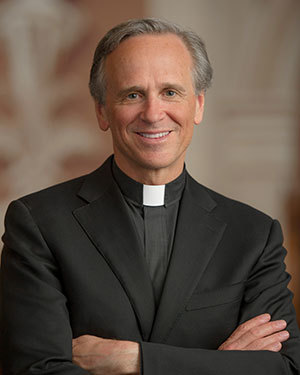

In [35]:
data  = requests.get('https://news.nd.edu/assets/154968/300x/john_jenkins_web.jpg')
image = Image.open(BytesIO(data.content))
display(image)

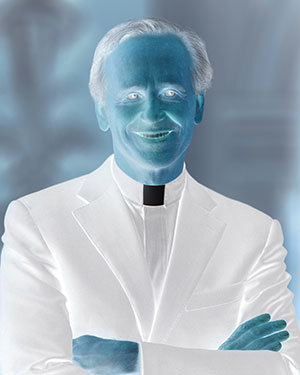

In [36]:
width, height = image.size

for x in range(width):
    for y in range(height):
        r, g, b = image.getpixel((x, y))
        new_r   = 255 - r
        new_g   = 255 - g
        new_b   = 255 - b
        
        image.putpixel((x, y), (new_r, new_g, new_b))

display(image)

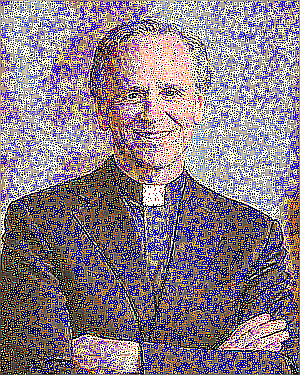

In [41]:
image = Image.open(BytesIO(data.content))
colors = [(12, 35, 64), (211, 159, 16)] 
width, height = image.size

# Adds noise
for x in range(width):
    for y in range(height):
        if not random.randint(0, 6):
            image.putpixel((x, y), random.choice(colors))

# Brighten image
for x in range(width):
    for y in range(height):
        r, g, b = image.getpixel((x, y))
        new_r   = r + 50
        new_g   = g + 50
        new_b   = b + 50
        image.putpixel((x, y), (new_r, new_g, new_b))

from PIL import ImageFilter

image = image.filter(ImageFilter.SHARPEN)
image = image.filter(ImageFilter.EDGE_ENHANCE_MORE)
        
display(image)

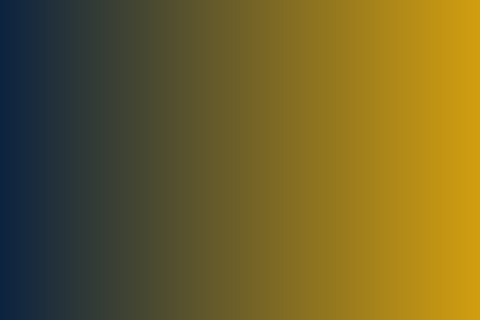

In [43]:
color1 = (12, 35, 64)
color2 = (211, 159, 16)
width  = 480
height = 320
image  = Image.new('RGBA', (width, height))

for x in range(width):
    for y in range(height):
        # weight    = 1.0 - (x / width)
        # new_color = source*weight + target*(1 - weight)
        weight = 1.0 - (x / width)
        new_r  = int(color1[0]*weight + color2[0]*(1 - weight))
        new_g  = int(color1[1]*weight + color2[1]*(1 - weight))
        new_b  = int(color1[2]*weight + color2[2]*(1 - weight))
        image.putpixel((x, y), (new_r, new_g, new_b))
        
display(image)